# CS405 Machine Learning: Lab 2 Preliminary
### Name: 车凯威
### ID: 12032207

__Objectives__：This lab will introduce how to pre-process and transform
data to make machine-learning algorithm work. In this lab, II will
employ several supervised algorithms of your choice to accurately model
individuals’ income using data collected from the 1994 U.S census. My
goal with this lab is to construct a model that accurately predicts whether
an individual makes more than $50000.

# 0 Exploring the Data

In [1]:
import numpy as np
import pandas as pd
from time import time
import visuals as vs

data = pd.read_csv("census.csv")
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


# Exercise 0:
A cursory investigation of the dataset will determine how many
individuals fit into either group, and will tell us about the percentage of
these individuals making more than 50,000. In the code cell below, I
will compute the following:   
1. The total number of records, ‘n_records’;  
2. The number of individuals making more than 50000 annually, ‘n_greater_50k’.   
3. The number of individuals making at most 50000
annually,‘n_at_most_50K’.   
4. The percentage of individuals making at more than $50000 annually, ‘greater_percent’’   
5. Feature values for each column  
Tips :As the data is stored as pandas, this tutorial will help you finish
https://pandas.pydata.org/pandas-docs/stable/10min.html


# Answer 0:
1. The total number of records, ‘n_records’;  
2. The number of individuals making more than 50000 annually, ‘n_greater_50k’.   
3. The number of individuals making at most 50000
annually,‘n_at_most_50K’.   
4. The percentage of individuals making at more than $50000 annually, ‘greater_percent’’   


In [2]:
# my code

n_records = len(data)

n_greater_50k = 0
n_at_most_50k = 0
for item in data['income']:
    if item == ">50K":
        n_greater_50k +=1
    else:
        n_at_most_50k +=1
greater_percent = n_greater_50k/n_records

print('\nn_records is',n_records,'\nn_greater_50k is',n_greater_50k,'\nn_at_most_50k is',n_at_most_50k,'\ngrater_precent is:',greater_percent)



n_records is 45222 
n_greater_50k is 11208 
n_at_most_50k is 34014 
grater_precent is: 0.2478439697492371


5. Feature values for each column

In [3]:
# my code

createVar = locals()
for item in data:
    createVar[item] = data[item]

# use "age" as an example 
print(age)

0        39
1        50
2        38
3        53
4        28
         ..
45217    33
45218    39
45219    38
45220    44
45221    35
Name: age, Length: 45222, dtype: int64


# 1 Preparing the Data
Before the data can be used as the input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

## 1.1 Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend
to lie near a single number, but will also have a non-trivial number of
vastly larger or smaller values than that single number. Algorithms can be
sensitive to such distributions of values and can underperform if the range
is not properly normalized. With the census dataset two features fit this
description: 'capital-gain' and ‘capital-loss'. The code cell below will plot
a histogram of these two features. Note the range of the values present
and how they are distributed.

age          workclass education_level  education-num  \
0       39          State-gov       Bachelors           13.0   
1       50   Self-emp-not-inc       Bachelors           13.0   
2       38            Private         HS-grad            9.0   
3       53            Private            11th            7.0   
4       28            Private       Bachelors           13.0   
...    ...                ...             ...            ...   
45217   33            Private       Bachelors           13.0   
45218   39            Private       Bachelors           13.0   
45219   38            Private       Bachelors           13.0   
45220   44            Private       Bachelors           13.0   
45221   35       Self-emp-inc       Bachelors           13.0   

            marital-status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cl

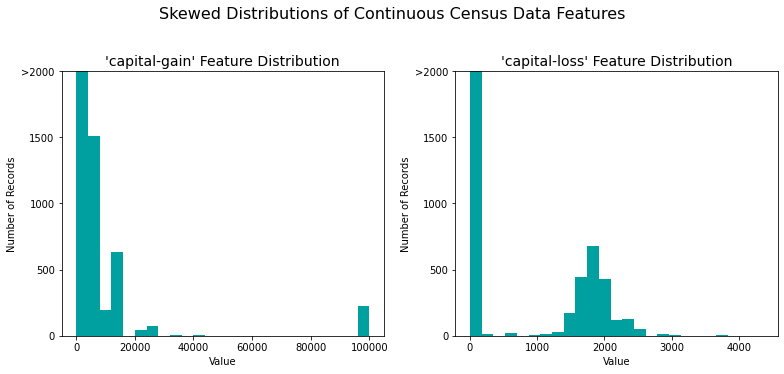

In [4]:
income_raw = data['income']
features_raw = data.drop('income',axis = 1)
print(features_raw)
vs.distribution(data)

For highly-skewed feature distributions such as ‘capital-gain' and
‘capital-loss’, it is common practice to apply a logarithmic transformation
on the data so that the very large and very small values do not negatively
affect the performance of a learning algorithm. Using a logarithmic
transformation significantly reduces the range of values caused by
outliers. Care must be taken when applying this transformation however:
The logarithm of 0 is undefined, so we must translate the values by a
small amount above 0 to apply the the logarithm successfully. Below
code cell will perform a transformation on the data and visualize the
results. Again, note the range of values and how they are distributed.

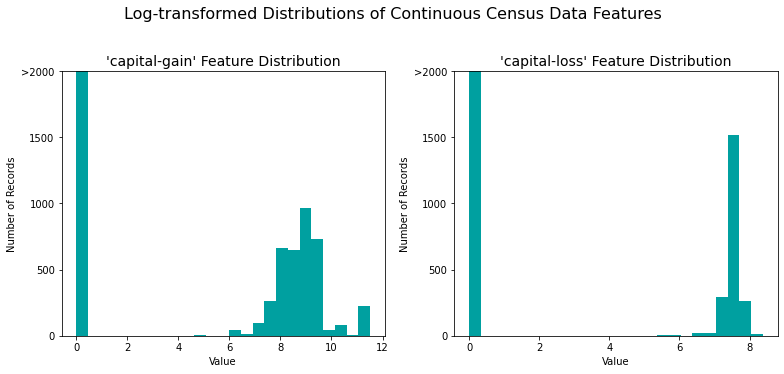

In [5]:
skewed = ['capital-gain','capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))
vs.distribution(features_log_transformed, transformed = True)

## 1.2 Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as ‘capital-gain’ or ‘capital-loss’ above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is
applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default = (0,1)
numerical = ['age','education-num','capital-gain','capital-loss','hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
display(features_log_minmax_transform.head(n=5))

features_numerical = features_log_minmax_transform[numerical]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### note
__scaler.fit_transform__:  
fit_transform方法是fit和transform的结合，fit_transform(X_train) 意思是找出X_train的均值和​​​​​​​标准差，并应用在X_train上。
这时对于X_test，我们就可以直接使用transform方法。因为此时StandardScaler已经保存了X_train的均值和标准差

二者的功能都是对数据进行某种统一处理（比如标准化~N(0,1)，将数据缩放(映射)到某个固定区间，归一化，正则化等）
fit_transform(partData)对部分数据先拟合fit，找到该part的整体指标，如均值、方差、最大值最小值等等（根据具体转换的目的），然后对该partData进行转换transform，从而实现数据的标准化、归一化等等。。
根据对之前部分fit的整体指标，对剩余的数据（restData）使用同样的均值、方差、最大最小值等指标进行转换transform(restData)，从而保证part、rest处理方式相同。
必须先用fit_transform(partData)，之后再transform(restData)
如果直接transform(partData)，程序会报错
如果fit_transfrom(partData)后，使用fit_transform(restData)而不用transform(restData)，虽然也能归一化，但是两个结果不是在同一个“标准”下的，具有明显差异
 

## 1.3 Data Preprocessing
From the table in above, we can see there are several features for each
record that are non-numeric. Typically, learning algorithms expect input
to be numeric, which requires that non-numeric features (called
‘categorical variables’) be converted. One popular way to convert
categorical variables is by using the one-hot encoding scheme. One-hot
encoding creates a ‘dummy’ variable for each possible category of each
non-numeric feature. For example, assume some features has three
possible entries: A, B and C. We then encode this feature into
someFeature_A, someFeature_B and someFeature_C.

Additionally, as with the non-numeric features, we need to convert the
non-numeric target label, ’income’ to numerical values for the learning
algorithm to work. Since there are only two possible categories for this
label ("<=50K" and ">50K"), we can avoid using one-hot encoding and
simply encode these two categories as 0 and 1, respectively

### note
```
pandas.get_dummies
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
```
Convert categorical variable into dummy/indicator variables.  


In [7]:
# my code

# select only the categorical data
features_categorical = data.drop(numerical,axis = 1)
features_categorical = features_categorical.drop('income',axis = 1)

# one-hot encode
features_categorical_dummies = pd.get_dummies(features_categorical)

display(features_categorical_dummies.head(n=5))

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


income preprocess 

In [8]:
# my code

feature_income = pd.DataFrame(data['income'])
feature_income = list(data['income'])

for idx,val in enumerate(feature_income):
    if val == '<=50K':
        feature_income[idx] = 0
    else:
        feature_income[idx] = 1

feature_income = pd.DataFrame(feature_income,columns=['income'])
display(feature_income.head(n=5))

,income
0,0
1,0
2,0
3,0
4,0


### note
https://pandas.pydata.org/docs/user_guide/merging.html  
The concat() function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series.


In [9]:
# my code

features_preprocessed = pd.concat([features_numerical, features_categorical_dummies], axis=1, sort=False)
display(features_preprocessed.head(n=5))

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2 Train the data
When all categorical variables have been converted into numerical
features, and all numerical features have been normalized. As always, we
will now split the data (both features and their labels) into training and
test sets. 80% of the data will be used for training and 20% for testing.

## 2.1 Train

In [10]:
# my code
X = pd.DataFrame(features_preprocessed).to_numpy()
y = pd.DataFrame(feature_income).to_numpy()
y = y.astype('int')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape[0])
print(X_test.shape[0])

36177
9045


In [11]:
# my code

# Train in three model
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

method = ["LogisticRegression","DecisionTreeClassifier","GaussianNB","RandomForestClassifier","SVM"]
## LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1, average='macro')

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
f1_score2 = f1_score(y_test, y_pred2, average='macro')

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)
f1_score3 = f1_score(y_test, y_pred3, average='macro')

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)
acc4 = accuracy_score(y_test, y_pred4)
f1_score4 = f1_score(y_test, y_pred4, average='macro')

from sklearn import svm
model = svm.SVC(gamma=0.001)
model.fit(X_train,y_train)
y_pred5 = model.predict(X_test)
acc5 = accuracy_score(y_test, y_pred5)
f1_score5 = f1_score(y_test, y_pred5, average='macro')

## 2.2 Evaluating Model Performance

Accuracy
Accuracy measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of
predictions.
In Python you can calculate it in the following way:  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [12]:
# my code

# evaluate
y_pred = np.vstack((y_pred1,y_pred2,y_pred3,y_pred4,y_pred5))
acc = [acc1,acc2,acc3,acc4,acc5]
f1_score = [f1_score1,f1_score2,f1_score3,f1_score4,f1_score5]

for i in range(0,5):
    print(method[i],':acc: %0.2f' % acc[i],',f1_score: %0.2f'% f1_score[i],'\n')


LogisticRegression :acc: 0.84 ,f1_score: 0.77 

DecisionTreeClassifier :acc: 0.82 ,f1_score: 0.75 

GaussianNB :acc: 0.60 ,f1_score: 0.59 

RandomForestClassifier :acc: 0.77 ,f1_score: 0.48 

SVM :acc: 0.84 ,f1_score: 0.74 



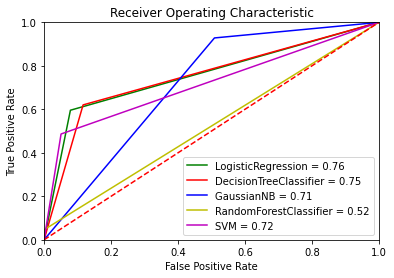

In [13]:
# Plot ROC
fpr = dict()
tpr = dict()
roc_auc = dict()


fpr, tpr, threshold = roc_curve(y_test, y_pred[0])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'LogisticRegression = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'DecisionTreeClassifier = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[2])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'GaussianNB = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[3])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'y', label = 'RandomForestClassifier = %0.2f' % roc_auc)

fpr, tpr, threshold = roc_curve(y_test, y_pred[4])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color ='m', label = 'SVM = %0.2f' % roc_auc)


plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3 Advanced Questions

(1) An important task when performing supervised learning on a dataset
like the census data we study here is determining which features
provides the most predictive power. Choose a scikit-learn classifier
(e.g adaboost, random forests) that has a ```feature_importance_```
attribute, which is a function that ranks the importance of features
according to the chosen classifier. List three of the supervised
learning models above that are appropriate for this problem that you
will test on the census data.

In [14]:
# my code

# find the importances of features
def important_feature(model):
    feature_importances = list(model.feature_importances_)
    features = list(features_preprocessed)
    feature_importances, features_arrange = zip(*sorted(zip(feature_importances, features)))
    features_arrange = list(features_arrange)
    features_arrange.reverse()
    print(features_arrange[0:5])

In [15]:
# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
important_feature(model)

# RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train,y_train)
important_feature(model)


['marital-status_ Married-civ-spouse', 'age', 'education-num', 'capital-gain', 'hours-per-week']
['marital-status_ Married-civ-spouse', 'relationship_ Husband', 'capital-gain', 'sex_ Male', 'education-num']


List three of the supervised learning models above that are appropriate for this problem that you will test on the census data.

1. Gaussian Naive Bayes (GaussianNB)  
2. Decision Trees  
3. Logistic Regression

(2) Describe one real-world application in industry where a model can
be applied

# Support Vector Machine(SVM)
In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

## Application
SVMs are helpful in text and hypertext categorization, as their application can significantly reduce the need for labeled training instances in both the standard inductive and transductive settings. Some methods for shallow semantic parsing are based on support vector machines. Hand-written characters can also be recognized using SVM.

## recognizing hand-written digits
the svm in scikit-learn can be used to recognize images of hand-written digits. Here is one example:

Automatically created module for IPython interactive environment
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 

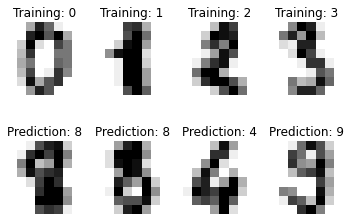

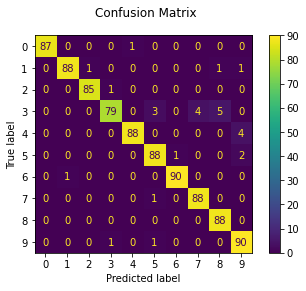

In [16]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

(3) What are the strengths of the model; when does it perform well?  
(4) What are the weaknesses of the model; when does it perform poorly?  


## Advantages:
SVM works relatively well when there is a clear margin of separation between classes.  
SVM is more effective in high dimensional spaces.  
SVM is effective in cases where the number of dimensions is greater than the number of samples.  
SVM is relatively memory efficient.  
## Disadvantages:
SVM algorithm is not suitable for large data sets.  
SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.  
In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.  
As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

(5) What makes this model a good candidate for the problem, given what
you know about the data?

As we know, "recognizing hand-written digits" is a "Nonlinear Classification" problem. The SVM algorithm is to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.[15]  is formally similar, except that every dot product is replaced by a nonlinear kernel function. 

This allows the algorithm to fit the maximum-margin hyperplane in a transformed feature space. The transformation may be nonlinear and the transformed space high-dimensional; although the classifier is a hyperplane in the transformed feature space, it may be nonlinear in the original input space.

# Reference
[1] C. Bahlmann, B. Haasdonk and H. Burkhardt, "Online handwriting recognition with support vector machines - a kernel approach," Proceedings Eighth International Workshop on Frontiers in Handwriting Recognition, Niagara on the Lake, Ontario, Canada, 2002, pp. 49-54, doi: 10.1109/IWFHR.2002.1030883.  
[2] Mustafa S. Kadhm, Asst. Prof. Dr. Alia Karim Abdul Hassan. Handwriting Word Recognition Based on SVM Classifier. 2015, 6(11)